In [1]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [24]:
df[['label','statement','subjects','speaker','speaker_job_title','state','party','context']].head(5)

,label,statement,subjects,speaker,speaker_job_title,state,party,context
0,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,Radio interview
1,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,a news conference
2,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,comments on ABC's This Week.
3,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,a radio show
4,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,a web video


In [26]:
pd.read_csv('/content/train_preview.csv')

,label,statement,subjects,speaker,speaker_job_title,state,party,context
0,TRUE,States with the highest gun ownership rates al...,guns,myra-signer,"Executive director, National Alliance on Menta...",Virgiia,organization,a conference.
1,FALSE,Teachers are working their third consecutive y...,education,kitty-boitnott,"President, Virginia Education Association",Virgina,none,a news conference.
2,half-true,Its estimated we leave somewhere north of $350...,"government-efficiency,taxes",gerry-connolly,U.S. Representative,Virginia,democrat,radio interview.
3,barely-true,The CDC is spending money on things like jazze...,"ebola,health-care,public-health",cory-gardner,U.S. House of Representatives,Colorado,republican,a debate
4,pants-fire,"The Democratic health care plan is a ""governme...",health-care,cw-bill-young,"U.S. Representative, Florida District 10",Florida,republican,a speech to Pinellas County Republicans.


In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
sorted(df['state'].dropna().unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'Atlanta',
 'California',
 'California ',
 'China',
 'Colorado',
 'Colorado ',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Florida ',
 'Georgia',
 'Georgia ',
 'Georgia  ',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Illinois ',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Massachusetts ',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Hampshire ',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York ',
 'None',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Oregon ',
 'PA - Pennsylvania',
 'Pennsylvania',
 'Qatar',
 'Rhode Island',
 'Rhode Island ',
 'Rhode island',
 'Russia',
 'South Carolina',
 'South Dakota',
 'Tennesse',
 'Tennessee',
 'Tex',
 'Texas',
 'United Kingdom',
 'Unknown',
 'Utah',
 'Vermont',
 'Virgiia',
 'Virgina',
 'Virginia',
 'Virginia ',
 'Virginia dire

In [ ]:
state_mapping = {
    'Atlanta': 'Georgia',
    'California ': 'California',
    'Colorado ': 'Colorado',
    'Illinois ': 'Illinois',
    'New Hampshire ': 'New Hampshire',
    'New York ': 'New York',
    'PA - Pennsylvania': 'Pennsylvania',
    'Rhode Island ': 'Rhode Island',
    'Tennesse': 'Tennessee',
    'Tex': 'Texas',
    'Virgiia': 'Virginia',
    'Virgina': 'Virginia',
    'ohio': 'Ohio',
    'Virginia ': 'Virginia',
    'Washington D.C.': 'Washington, D.C.',
    'Washington DC': 'Washington, D.C.',
    'Washington, D.C. ': 'Washington, D.C.',
    'Wisconsin ': 'Wisconsin',
    'Florida ': 'Florida',
    'Georgia ': 'Georgia',
    'Georgia  ': 'Georgia',
    'Massachusetts ': 'Massachusetts',
    'Oregon ': 'Oregon',
    'Rhode island': 'Rhode Island',
    'Virginia director, Coalition to Stop Gun Violence': 'Virginia',
    'District of Columbia': 'Washington, D.C.',
    'Washington state': 'Washington'
}

# Replace non-standard names with correct names
df['state'] = df['state'].replace(state_mapping)

valid_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Washington, D.C.']

df = df[df['state'].isin(valid_states)]

In [ ]:
#calculate each speaker's percentage of "FALSE" in adj_label
valid_state_df = df.groupby('state').filter(lambda x: len(x) >= 25)
df_state_false_rate = (valid_state_df.groupby('state')['adj_label']
                          .apply(lambda x: (x == 'FALSE').sum() / x.count())
                          .reset_index(name='false_rate'))
df_state_false_rate

,state,false_rate
0,Alaska,0.567901
1,Arizona,0.425439
2,Arkansas,0.407767
3,California,0.385870
4,Colorado,0.575758
5,Connecticut,0.222222
6,Delaware,0.369048
7,Florida,0.411479
8,Georgia,0.364621
9,Illinois,0.280576


In [ ]:
df_state_false_rate.sort_values(by=['false_rate'], inplace=True)
df_state_false_rate

,state,false_rate
5,Connecticut,0.222222
21,New Mexico,0.270270
9,Illinois,0.280576
32,Vermont,0.299145
13,Maryland,0.313953
23,North Carolina,0.333333
24,Ohio,0.342954
8,Georgia,0.364621
6,Delaware,0.369048
20,New Jersey,0.370492


In [ ]:
len(df[df['state']=='Colorado'])

33

In [ ]:
df_election2016 = pd.read_csv('how-many-states-did-trump-win-in-2016?.csv')
df_election2016

,state,2016Winner,PVI,GovernorParty,SenateParty
0,Alabama,Trump,15,Republican,Republican
1,Alaska,Trump,8,Republican,Republican
2,Arizona,Trump,2,Democratic,Democratic & Independent
3,Arkansas,Trump,16,Republican,Republican
4,California,Clinton,-13,Democratic,Democratic
5,Colorado,Clinton,-4,Democratic,Democratic
6,Connecticut,Clinton,-7,Democratic,Democratic
7,Delaware,Clinton,-7,Democratic,Democratic
8,Florida,Trump,3,Republican,Republican
9,Georgia,Trump,3,Republican,Democratic


In [ ]:
# prompt: left join df and df_election2016 on state

election2016_df = df_state_false_rate.merge(df_election2016, on='state', how='left')
election2016_df

,state,false_rate,2016Winner,PVI,GovernorParty,SenateParty
0,Connecticut,0.222222,Clinton,-7.0,Democratic,Democratic
1,New Mexico,0.270270,Clinton,-3.0,Democratic,Democratic
2,Illinois,0.280576,Clinton,-7.0,Democratic,Democratic
3,Vermont,0.299145,Clinton,-16.0,Republican,Democratic & Independent
4,Maryland,0.313953,Clinton,-14.0,Democratic,Democratic
5,North Carolina,0.333333,Trump,3.0,Democratic,Republican
6,Ohio,0.342954,Trump,6.0,Republican,Both
7,Georgia,0.364621,Trump,3.0,Republican,Democratic
8,Delaware,0.369048,Clinton,-7.0,Democratic,Democratic
9,New Jersey,0.370492,Clinton,-6.0,Democratic,Democratic


In [ ]:
election2016_df.loc[election2016_df['state'] == 'Washington, D.C.', '2016Winner'] = 'Clinton'
election2016_df[['state','false_rate', '2016Winner']]

,state,false_rate,2016Winner
0,Connecticut,0.222222,Clinton
1,New Mexico,0.270270,Clinton
2,Illinois,0.280576,Clinton
3,Vermont,0.299145,Clinton
4,Maryland,0.313953,Clinton
5,North Carolina,0.333333,Trump
6,Ohio,0.342954,Trump
7,Georgia,0.364621,Trump
8,Delaware,0.369048,Clinton
9,New Jersey,0.370492,Clinton


In [ ]:
# prompt: save election2016_df[['state','false_rate', '2016Winner']] as csv

election2016_df[['state','false_rate', '2016Winner']].to_csv('election2016.csv')


In [ ]:
from scipy.stats import ttest_ind
# Separate the data into two groups based on the winner
trump_group = election2016_df[election2016_df['2016Winner'] == 'Trump']['false_rate']
clinton_group = election2016_df[election2016_df['2016Winner'] == 'Clinton']['false_rate']

# Perform t-test
t_stat, p_value = ttest_ind(trump_group, clinton_group)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The difference in false rates is statistically significant.")
else:
    print("There is no significant difference in false rates between Trump and Clinton.")

T-statistic: 1.1069218156562235
P-value: 0.2760980125074499
There is no significant difference in false rates between Trump and Clinton.


In [ ]:
# prompt: trump_group mean cliton as well

# Calculate the mean of the false rate for each group
trump_mean = trump_group.mean()
clinton_mean = clinton_group.mean()

# Print the results
print("Trump group mean false rate:", trump_mean)
print("Clinton group mean false rate:", clinton_mean)


Trump group mean false rate: 0.4445978762883374
Clinton group mean false rate: 0.4086094586540111


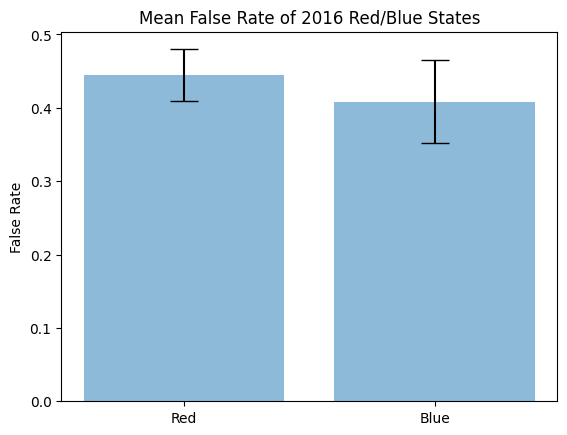

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns  # Optional: seaborn for better style

# Assuming you have calculated trump_mean, clinton_mean, trump_group, clinton_group as mentioned in the previous example

# Degrees of freedom (assuming unequal variances)
df_trump = len(trump_group) - 1
df_clinton = len(clinton_group) - 1

# Calculate the t-critical value for a 95% confidence interval
t_critical = t.ppf(0.975, df_trump + df_clinton)

# Calculate confidence intervals using t-distribution
confidence_interval_trump = t_critical * (trump_group.std() / np.sqrt(len(trump_group)))
confidence_interval_clinton = t_critical * (clinton_group.std() / np.sqrt(len(clinton_group)))

# Prepare data
x = ['Red', 'Blue']
y = [trump_mean, clinton_mean]
yerr = [confidence_interval_trump, confidence_interval_clinton]

# Create plot
fig, ax = plt.subplots()

# Bar plot with error bars
bars = ax.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('False Rate')
ax.set_title('Mean False Rate of 2016 Red/Blue States')

# Show plot
plt.show()

In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
sorted(df['speaker_job_title'].dropna().unique())

[' secretary-general of the United Nations',
 '29th Congressional District candidate',
 "4th Congressional District's congressman",
 '501 (c) (4) educational group',
 '8th District congressional candidate',
 '9-12 member in Tampa',
 'A liberal-oriented advocacy organization',
 'A ride-sharing service',
 'ABC News',
 'ABC News chief White House correspondent',
 "ABC News' Chief Health and Medical Editor. ",
 'Accountant',
 'Activist group',
 'Activist group focusing on campaign finance, corruption',
 'Activist, stay-at-home mom',
 'Actor',
 'Actor and director',
 'Actor, director, activist',
 'Actress',
 'Adjunct Senior Fellow for Middle Eastern Studies at Council on Foreign Relations',
 'Advertising executive',
 'Adviser',
 'Adviser to President Barack Obama',
 'Advocacy',
 'Advocacy group',
 'Advocacy group for U.S. policy toward Israel',
 "Affiliated professor of public policy at Georgetown University's Public Policy Institute",
 'Aide',
 'Airport owner',
 'Alaska Department of Publi

In [ ]:
# prompt: sorted(df['speaker_job_title'].dropna().unique()) that contain 'representative' or 'senate'

representative_senate_titles = [title for title in sorted(df['speaker_job_title'].dropna().unique()) if 'representative' in title.lower() or 'senate' in title.lower()]
print(representative_senate_titles)


['Assembly representative', 'California Senate leader', 'Candidate for U.S. Senate', 'Candidate for U.S. Senate ', 'Candidate for U.S. Senate and physician', 'Co-Speaker of the Oregon House of Representatives', 'Colorado U.S. Representative ', "Congressional representative for California's 14th District", 'Democratic candidate for U.S. Senate', 'District 43 state representative', 'District 69 state representative', 'District 79 representative', 'Florida House of Representatives', 'Florida Senate President', 'Former U.S. Representative', "Former U.S. representative from Ohio's 11th District", "Former U.S. representative from Ohio's 18th District", 'Group representing Senate Republicans', 'House Speaker and U.S. Senate candidate', 'Illinois Senate Republican Leader', 'Illinois state representative', 'Louisiana state representative', 'Majority Leader for the Florida House of Representatives ', 'Member of Florida House of Representatives', 'Member, U.S. House of Representatives', 'Minority

In [ ]:
US_representative_senate_lst = ['Candidate for U.S. Senate',
 'Candidate for U.S. Senate ',
 'Candidate for U.S. Senate and physician',
 'Colorado U.S. Representative ',
 "Congressional representative for California's 14th District",
 'Democratic candidate for U.S. Senate',
 'House Speaker and U.S. Senate candidate',
 'Member, U.S. House of Representatives',
 'Representative',
 'Representative (D-CA 37th District) ',
 "Representative from Ohio's 11th Congressional District",
 "Representative from Ohio's 18th Congressional District",
 "Representative from Ohio's 3rd Congressional District",
 "Representative from Ohio's Ninth Congressional District",
 'Representative from the 21st Congressional District',
 'Representative of 9th District of Illinois',
 'Representative, S.C. 5th congressional district',
 'Republican candidate for U.S. Senate',
 'Senate Candidate',
 'Senate Democratic Leader',
 'Senate Majority Leader',
 'Senate minority leader',
 'Speaker of the House of Representatives',
 'Texas congressman in the U.S. Houst of Representatives',
 'U.S. House Representative',
 'U.S. House of Representative',
 'U.S. House of Representatives',
 'U.S. House representative',
 'U.S. Representative',
 'U.S. Representative ',
 'U.S. Representative and House Majority Whip',
 'U.S. Representative for Ohio, District 1',
 'U.S. Representative, Florida District 10',
 'U.S. Representative, Florida District 17',
 'U.S. Representative, Florida District 2',
 'U.S. Representative, Florida District 23',
 'U.S. Representative, Florida District 25',
 'U.S. Representative, Florida District 8',
 'U.S. Representativej',
 'U.S. Senate Candidate',
 'U.S. Senate candidate',
 'U.S. representative',
 'U.S. representative ',
 'U.S. representative from Fort Myers',
 "U.S. representative from Ohio's 13th District",
 'U.S. representative, Florida District 22']

In [ ]:
#calculate each speaker's percentage of "FALSE" in adj_label
valid_congressman_df = df[df['speaker_job_title'].isin(US_representative_senate_lst)].groupby('speaker').filter(lambda x: len(x) >= 5)
df_congressman_false_rate = (valid_congressman_df.groupby('speaker')['adj_label']
                          .apply(lambda x: (x == 'FALSE').sum() / x.count())
                          .reset_index(name='false_rate'))
df_congressman_false_rate

,speaker,false_rate
0,alan-grayson,0.352941
1,allen-west,0.730769
2,betty-sutton,0.375000
3,bill-pascrell,0.272727
4,bob-gibbs,0.400000
5,charles-bass,1.000000
6,connie-mack,0.533333
7,cory-gardner,1.000000
8,david-perdue,0.437500
9,debbie-wasserman-schultz,0.404255


In [ ]:
# prompt: write csv for df_congressman_false_rate

df_congressman_false_rate.to_csv('df_congressman_false_rate.csv', index=False)


In [ ]:
df_congressman_result = pd.read_csv('df_congressman_result.csv')
df_congressman_result['lose/win']=df_congressman_result['lose_rate']/df_congressman_result['win_rate']
df_congressman_result = df_congressman_result[df_congressman_result['year'].isin([2016])]
df_congressman_result

,speaker,false_rate,result,year,win_rate,lose_rate,lose/win
3,bill-pascrell,0.272727,Win,2016,0.6900,0.2800,0.405797
4,bob-gibbs,0.400000,Win,2016,0.6404,0.2896,0.452217
7,cory-gardner,1.000000,Win,2016,0.4821,0.4626,0.959552
9,debbie-wasserman-schultz,0.404255,Win,2016,0.5670,0.4049,0.714109
11,duncan-hunter,0.200000,Win,2016,0.6350,0.3650,0.574803
12,earl-blumenauer,0.166667,Win,2016,0.7200,0.2000,0.277778
13,gerry-connolly,0.142857,Win,2016,0.8790,0.1210,0.137656
14,greg-walden,0.600000,Win,2016,0.6987,0.2729,0.390583
17,jim-jordan,0.111111,Win,2016,0.6799,0.3201,0.470805
18,jim-renacci,0.625000,Win,2016,0.6500,0.3500,0.538462


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     7.339
Date:                Mon, 05 Feb 2024   Prob (F-statistic):             0.0122
Time:                        19:39:32   Log-Likelihood:                 4.3639
No. Observations:                  26   AIC:                            -4.728
Df Residuals:                      24   BIC:                            -2.212
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3849      0.072      5.364      0.0

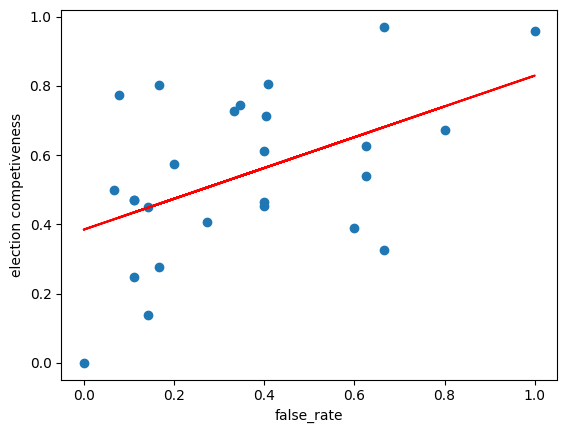

In [ ]:
# prompt: run linear regression y is win/lose x is false_rate

import statsmodels.api as sm

# Prepare data
X = df_congressman_result['false_rate'].values.reshape(-1, 1)
y = df_congressman_result['lose/win'].values

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make predictions
predictions = model.predict(X)

# Plot the data and the regression line
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], predictions, color='red')
plt.ylabel('election competiveness')
plt.xlabel('false_rate')
plt.show()


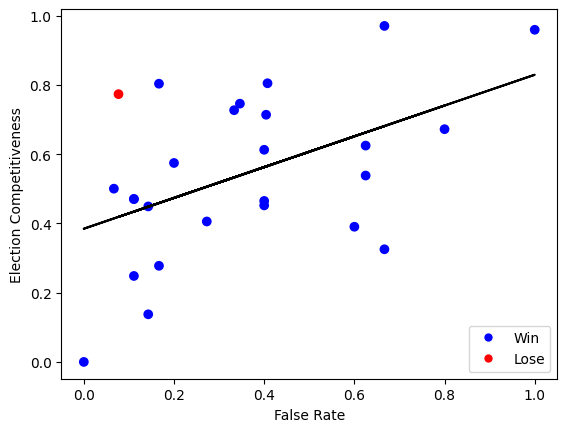

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Prepare data
X = df_congressman_result['false_rate'].values.reshape(-1, 1)
y = df_congressman_result['lose/win'].values

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Plot the data and the regression line with color mapping
colors = np.where(df_congressman_result['result'] == 'Win', 'blue', 'red')

plt.scatter(X[:, 1], y, c=colors)
plt.plot(X[:, 1], predictions, color='black')

plt.ylabel('Election Competitiveness')
plt.xlabel('False Rate')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=7, label='Win'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=7, label='Lose')
], loc='lower right')
plt.show()


 ## Fake news percentage by politician

In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
#remove speakers that has shows up less than 25 times
valid_speaker_df = df.groupby('speaker').filter(lambda x: len(x) >= 25)
#calculate each speaker's percentage of "FALSE" in adj_label
df_speaker_false_rate = (valid_speaker_df.groupby('speaker')['adj_label']
                          .apply(lambda x: (x == 'FALSE').sum() / x.count())
                          .reset_index(name='false_rate'))
df_speaker_false_rate

,speaker,false_rate
0,alan-grayson,0.352941
1,allen-west,0.730769
2,barack-obama,0.261866
3,ben-carson,0.821429
4,bernie-s,0.283019
...,...,...
70,tim-kaine,0.222222
71,tom-barrett,0.384615
72,tommy-thompson,0.586207
73,viral-image,0.892857


In [ ]:
# prompt: I want df_speaker_false_rate still have party column, i want the result has the same row number
df_speaker_false_rate = pd.merge(df_speaker_false_rate, df[['speaker', 'party']].drop_duplicates('speaker'), on='speaker')
df_speaker_false_rate

,speaker,false_rate,party
0,alan-grayson,0.352941,democrat
1,allen-west,0.730769,republican
2,barack-obama,0.261866,democrat
3,ben-carson,0.821429,republican
4,bernie-s,0.283019,independent
...,...,...,...
70,tim-kaine,0.222222,democrat
71,tom-barrett,0.384615,democrat
72,tommy-thompson,0.586207,republican
73,viral-image,0.892857,none


In [ ]:
#list the top 10 (has highest false_rate) speakers

df_speaker_false_rate.sort_values(by='false_rate', ascending=False).head(10)


,speaker,false_rate,party
10,chain-email,0.893258,none
73,viral-image,0.892857,none
8,blog-posting,0.864198,none
17,democratic-congressional-campaign-committee,0.823529,democrat
3,ben-carson,0.821429,republican
63,rush-limbaugh,0.810811,none
40,michele-bachmann,0.754098,republican
1,allen-west,0.730769,republican
20,donald-trump,0.702624,republican
48,national-republican-senatorial-committee,0.700000,republican


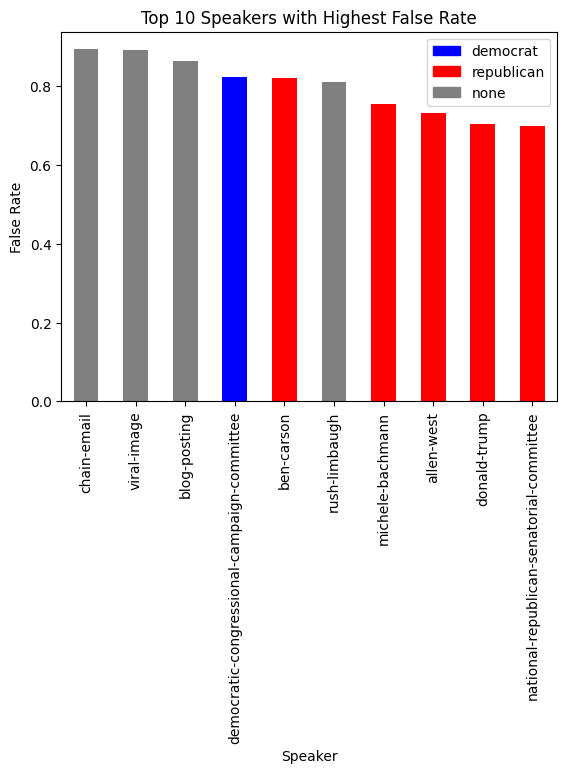

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palettes

# Assuming df_speaker_false_rate is your DataFrame
top_speakers = df_speaker_false_rate.sort_values(by='false_rate', ascending=False).head(10)

# Create a color mapping based on the 'party' column
color_mapping = {'democrat': 'blue', 'republican': 'red', 'none': 'gray'}
colors = top_speakers['party'].map(color_mapping)

# Plot the bar chart
ax = top_speakers.plot(kind='bar', x='speaker', y='false_rate', color=colors, legend=False)

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[party]) for party in color_mapping]
labels = list(color_mapping.keys())
plt.legend(handles, labels, loc='upper right')

plt.title('Top 10 Speakers with Highest False Rate')
plt.xlabel('Speaker')
plt.ylabel('False Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_speaker_false_rate.sort_values(by='false_rate', ascending=True).head(10)

,speaker,false_rate,party
19,dennis-kucinich,0.160000,democrat
6,bill-nelson,0.185185,democrat
59,rob-portman,0.191489,republican
5,bill-clinton,0.219512,democrat
70,tim-kaine,0.222222,democrat
66,sherrod-brown,0.235294,democrat
74,wendy-davis,0.259259,democrat
2,barack-obama,0.261866,democrat
30,hillary-clinton,0.265993,democrat
4,bernie-s,0.283019,independent


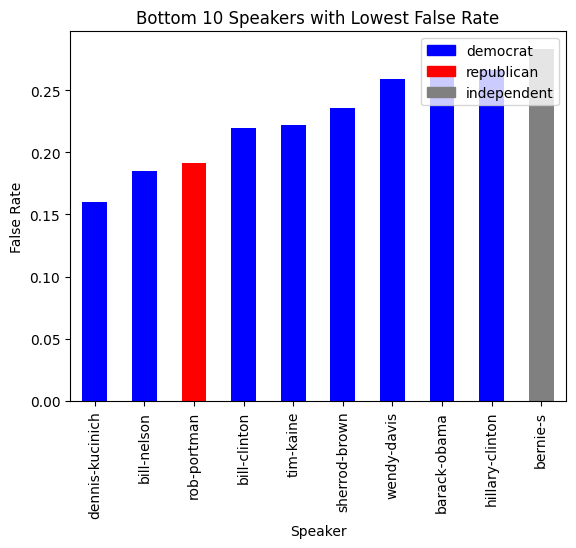

In [ ]:
# Assuming df_speaker_false_rate is your DataFrame
top_speakers = df_speaker_false_rate.sort_values(by='false_rate', ascending=True).head(10)

# Create a color mapping based on the 'party' column
color_mapping = {'democrat': 'blue', 'republican': 'red', 'independent': 'gray'}
colors = top_speakers['party'].map(color_mapping)

# Plot the bar chart
ax = top_speakers.plot(kind='bar', x='speaker', y='false_rate', color=colors, legend=False)

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[party]) for party in color_mapping]
labels = list(color_mapping.keys())
plt.legend(handles, labels, loc='upper right')

plt.title('Bottom 10 Speakers with Lowest False Rate')
plt.xlabel('Speaker')
plt.ylabel('False Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#remove speakers that has shows up less than 25 times
valid_speaker_df = df.groupby('speaker').filter(lambda x: len(x) >= 25)
#calculate each speaker's percentage of "pants-fire" in label
df_speaker_pantsfire_rate = (valid_speaker_df.groupby('speaker')['label']
                          .apply(lambda x: (x == 'pants-fire').sum() / x.count())
                          .reset_index(name='pants-fire_rate'))
df_speaker_pantsfire_rate

,speaker,pants-fire_rate
0,alan-grayson,0.029412
1,allen-west,0.153846
2,barack-obama,0.014730
3,ben-carson,0.142857
4,bernie-s,0.000000
...,...,...
70,tim-kaine,0.000000
71,tom-barrett,0.115385
72,tommy-thompson,0.103448
73,viral-image,0.535714


In [ ]:
df_speaker_pantsfire_rate = pd.merge(df_speaker_pantsfire_rate, df[['speaker', 'party']].drop_duplicates('speaker'), on='speaker')
df_speaker_pantsfire_rate

,speaker,pants-fire_rate,party
0,alan-grayson,0.029412,democrat
1,allen-west,0.153846,republican
2,barack-obama,0.014730,democrat
3,ben-carson,0.142857,republican
4,bernie-s,0.000000,independent
...,...,...,...
70,tim-kaine,0.000000,democrat
71,tom-barrett,0.115385,democrat
72,tommy-thompson,0.103448,republican
73,viral-image,0.535714,none


In [ ]:
df_speaker_pantsfire_rate.sort_values(by='pants-fire_rate', ascending=False).head(10)

,speaker,pants-fire_rate,party
10,chain-email,0.589888,none
8,blog-posting,0.543210,none
73,viral-image,0.535714,none
22,facebook-posts,0.360000,none
63,rush-limbaugh,0.270270,none
17,democratic-congressional-campaign-committee,0.264706,democrat
40,michele-bachmann,0.262295,republican
37,josh-mandel,0.206897,republican
26,glenn-beck,0.193548,none
20,donald-trump,0.177843,republican


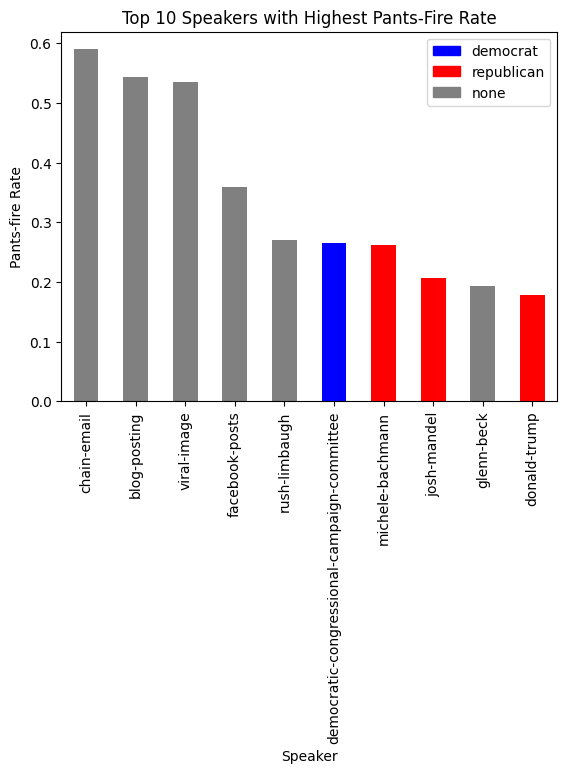

In [ ]:
# Assuming df_speaker_false_rate is your DataFrame
top_speakers = df_speaker_pantsfire_rate.sort_values(by='pants-fire_rate', ascending=False).head(10)

# Create a color mapping based on the 'party' column
color_mapping = {'democrat': 'blue', 'republican': 'red', 'none': 'gray'}
colors = top_speakers['party'].map(color_mapping)

# Plot the bar chart
ax = top_speakers.plot(kind='bar', x='speaker', y='pants-fire_rate', color=colors, legend=False)

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[party]) for party in color_mapping]
labels = list(color_mapping.keys())
plt.legend(handles, labels, loc='upper right')

plt.title('Top 10 Speakers with Highest Pants-Fire Rate')
plt.xlabel('Speaker')
plt.ylabel('Pants-fire Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#remove speakers that has shows up less than 25 times
valid_speaker_df = df.groupby('speaker').filter(lambda x: len(x) >= 25)
#calculate each speaker's percentage of "TRUE" in label
df_speaker_TRUE_rate = (valid_speaker_df.groupby('speaker')['label']
                          .apply(lambda x: (x == 'TRUE').sum() / x.count())
                          .reset_index(name='TRUE_rate'))
df_speaker_TRUE_rate

,speaker,TRUE_rate
0,alan-grayson,0.205882
1,allen-west,0.115385
2,barack-obama,0.201309
3,ben-carson,0.000000
4,bernie-s,0.132075
...,...,...
70,tim-kaine,0.185185
71,tom-barrett,0.115385
72,tommy-thompson,0.103448
73,viral-image,0.000000


In [ ]:
df_speaker_TRUE_rate = pd.merge(df_speaker_TRUE_rate, df[['speaker', 'party']].drop_duplicates('speaker'), on='speaker')
df_speaker_TRUE_rate

,speaker,TRUE_rate,party
0,alan-grayson,0.205882,democrat
1,allen-west,0.115385,republican
2,barack-obama,0.201309,democrat
3,ben-carson,0.000000,republican
4,bernie-s,0.132075,independent
...,...,...,...
70,tim-kaine,0.185185,democrat
71,tom-barrett,0.115385,democrat
72,tommy-thompson,0.103448,republican
73,viral-image,0.000000,none


In [ ]:
#list the top 10 (has highest false_rate) speakers

df_speaker_TRUE_rate.sort_values(by='TRUE_rate', ascending=False).head(10)


,speaker,TRUE_rate,party
19,dennis-kucinich,0.440000,democrat
66,sherrod-brown,0.382353,democrat
59,rob-portman,0.340426,republican
25,george-will,0.322581,columnist
34,john-cornyn,0.321429,republican
24,george-allen,0.296296,republican
14,david-cicilline,0.275862,democrat
46,nathan-deal,0.269231,republican
35,john-kasich,0.253731,republican
30,hillary-clinton,0.245791,democrat


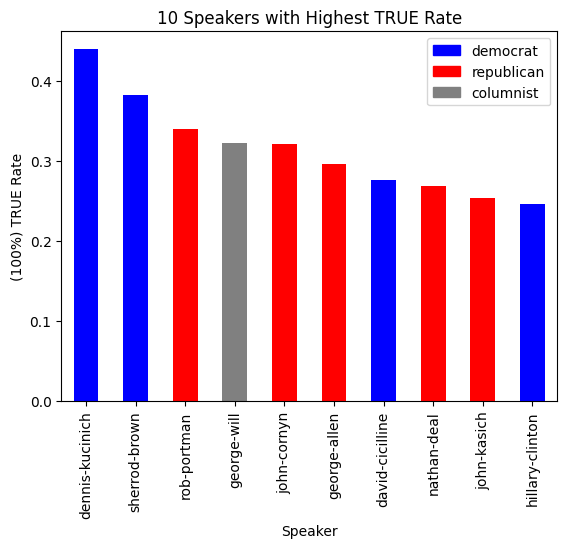

In [ ]:
import matplotlib.pyplot as plt
# Assuming df_speaker_false_rate is your DataFrame
top_speakers = df_speaker_TRUE_rate.sort_values(by='TRUE_rate', ascending=False).head(10)

# Create a color mapping based on the 'party' column
color_mapping = {'democrat': 'blue', 'republican': 'red', 'columnist': 'gray'}
colors = top_speakers['party'].map(color_mapping)

# Plot the bar chart
ax = top_speakers.plot(kind='bar', x='speaker', y='TRUE_rate', color=colors, legend=False)

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[party]) for party in color_mapping]
labels = list(color_mapping.keys())
plt.legend(handles, labels, loc='upper right')
plt.title('10 Speakers with Highest TRUE Rate')
plt.xlabel('Speaker')
plt.ylabel('(100%) TRUE Rate')
plt.xticks(rotation=90)
plt.show()

## Fake news percentage by job title

In [ ]:
#remove job title that has shows up less than 100 times
valid_jobtitle_df = df.groupby('speaker_job_title').filter(lambda x: len(x) >= 100)
#calculate each job title's percentage of "FALSE" in adj_label
df_jobtitle_false_rate = (valid_jobtitle_df.groupby('speaker_job_title')['adj_label']
                          .apply(lambda x: (x == 'FALSE').sum() / x.count())
                          .reset_index(name='false_rate'))
df_jobtitle_false_rate

,speaker_job_title,false_rate
0,Attorney,0.500000
1,Former governor,0.419811
2,Governor,0.451745
3,Governor of New Jersey,0.346154
4,Milwaukee County Executive,0.453552
5,President,0.261789
6,President-Elect,0.702624
7,Presidential candidate,0.267516
8,Senator,0.549223
9,Social media posting,0.680000


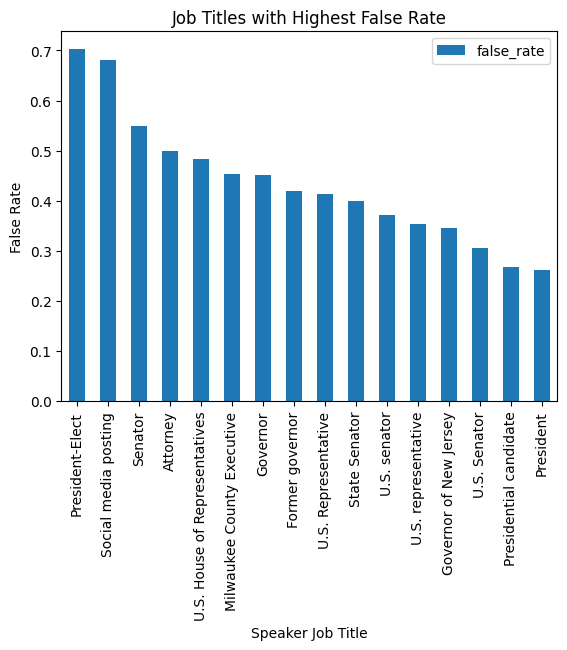

In [ ]:
df_jobtitle_false_rate.sort_values(by='false_rate', ascending=False).plot(kind='bar', x='speaker_job_title', y='false_rate')
plt.title('Job Titles with Highest False Rate')
plt.xlabel('Speaker Job Title')
plt.ylabel('False Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

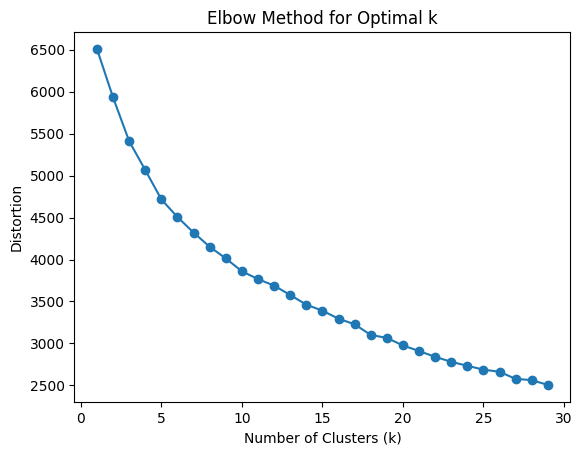

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a TF-IDF vectorizer to convert job titles to numerical features
df = df[df['speaker_job_title'].notna()]
# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Get embeddings for job titles
embeddings = embed(df['speaker_job_title'].tolist())

# Use TruncatedSVD for dimensionality reduction
#svd = TruncatedSVD(n_components=2)
#X_svd = svd.fit_transform(embeddings)
X_svd = embeddings
# Determine the optimal number of clusters using the Elbow method
distortions = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_svd)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 30), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# Based on the Elbow method, let's choose an optimal k (number of clusters)
optimal_k = 28

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_svd)

# Display the results
print(df[['speaker_job_title', 'cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                speaker_job_title  cluster
0                                        Governor        7
1                            State representative        5
2                                 President-Elect        6
3                                      consultant       11
6      Child and education advocacy organization.       18
...                                           ...      ...
12783                                    Attorney       14
12785                       House Majority Leader       12
12786                                   President        1
12787                      Presidential candidate       10
12790                                    Attorney       14

[9224 rows x 2 columns]


In [ ]:
df[['speaker_job_title', 'cluster']][df['cluster']==2]['speaker_job_title'].unique()

array(['U.S. Senator', 'U.S. senator', 'U.S. Senator for Arkansas',
       'Former U.S. Senator', 'former U.S. Senator',
       'United States Senator'], dtype=object)

In [ ]:
# prompt: if clluster is 1 then title_cat is president, if clluster is 2 then title_cat is senator, if clluster is 3 then title_cat is representative, else is other

def categorize_job_title(cluster):
  if cluster == 2 or cluster == 17 or cluster == 22:
    return 'U.S. Senator'
  elif cluster == 3 or cluster == 13 or cluster == 21:
    return 'U.S. Representative'
  elif cluster == 4:
    return 'State Congressman'
  elif cluster == 7 or cluster == 19 or cluster == 25 or cluster == 26:
    return 'Governor'
  elif cluster == 8:
    return 'Mainstream Media'
  elif cluster == 9:
    return 'Social Media Posting'
  elif cluster == 14:
    return 'Attorney'
  elif cluster == 16:
    return 'Commentator on Mainstream Media'
  elif cluster == 20:
    return 'Mayer or City Council Member'
  else:
    return 'Other'

df['title_cat'] = df['cluster'].apply(categorize_job_title)


In [ ]:
df_titlecat_false_rate = (df.groupby('title_cat')['adj_label']
                          .apply(lambda x: (x == 'FALSE').sum() / x.count())
                          .reset_index(name='false_rate'))
df_titlecat_false_rate

,title_cat,false_rate
0,Attorney,0.480315
1,Commentator on Mainstream Media,0.516129
2,Governor,0.415771
3,Mainstream Media,0.394737
4,Mayer or City Council Member,0.375527
5,Other,0.416172
6,Social Media Posting,0.680000
7,State Congressman,0.462329
8,U.S. Representative,0.450402
9,U.S. Senator,0.372470


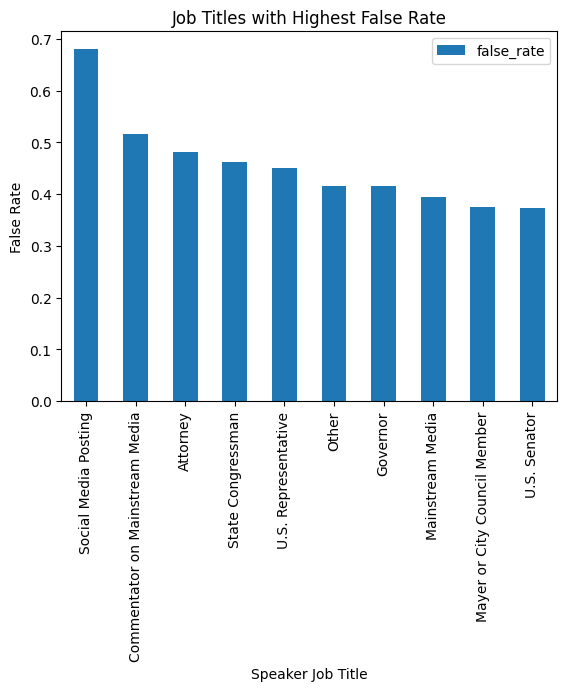

In [ ]:
df_titlecat_false_rate.sort_values(by='false_rate', ascending=False).plot(kind='bar', x='title_cat', y='false_rate')
plt.title('Job Titles with Highest False Rate')
plt.xlabel('Speaker Job Title')
plt.ylabel('False Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_titlecat_pantsfire_rate = (df.groupby('title_cat')['label']
                          .apply(lambda x: (x == 'pants-fire').sum() / x.count())
                          .reset_index(name='pantsfire_rate'))
df_titlecat_pantsfire_rate

,title_cat,pantsfire_rate
0,Attorney,0.066929
1,Commentator on Mainstream Media,0.111437
2,Governor,0.073477
3,Mainstream Media,0.078947
4,Mayer or City Council Member,0.059072
5,Other,0.068524
6,Social Media Posting,0.360000
7,State Congressman,0.065068
8,U.S. Representative,0.063450
9,U.S. Senator,0.031579


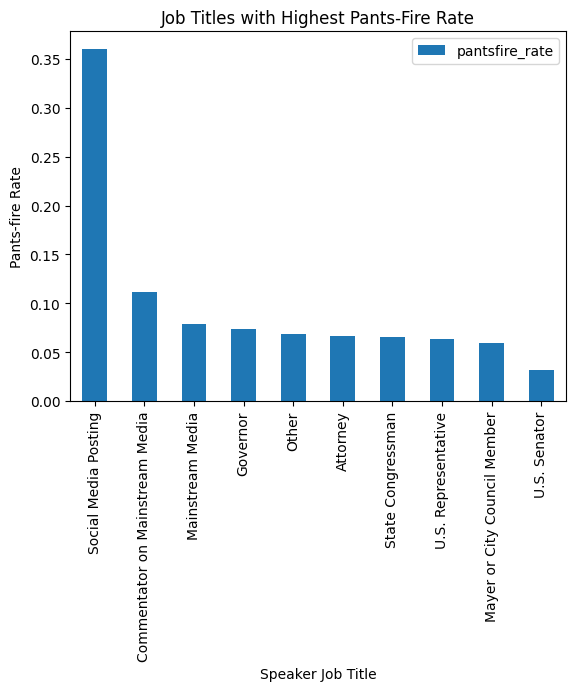

In [ ]:
df_titlecat_pantsfire_rate.sort_values(by='pantsfire_rate', ascending=False).plot(kind='bar', x='title_cat', y='pantsfire_rate')
plt.title('Job Titles with Highest Pants-Fire Rate')
plt.xlabel('Speaker Job Title')
plt.ylabel('Pants-fire Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_titlecat_TRUE_rate = (df.groupby('title_cat')['label']
                          .apply(lambda x: (x == 'TRUE').sum() / x.count())
                          .reset_index(name='TRUE_rate'))
df_titlecat_TRUE_rate

,title_cat,TRUE_rate
0,Attorney,0.145669
1,Commentator on Mainstream Media,0.123167
2,Governor,0.157706
3,Mainstream Media,0.203947
4,Mayer or City Council Member,0.189873
5,Other,0.178620
6,Social Media Posting,0.060000
7,State Congressman,0.119863
8,U.S. Representative,0.164433
9,U.S. Senator,0.183806


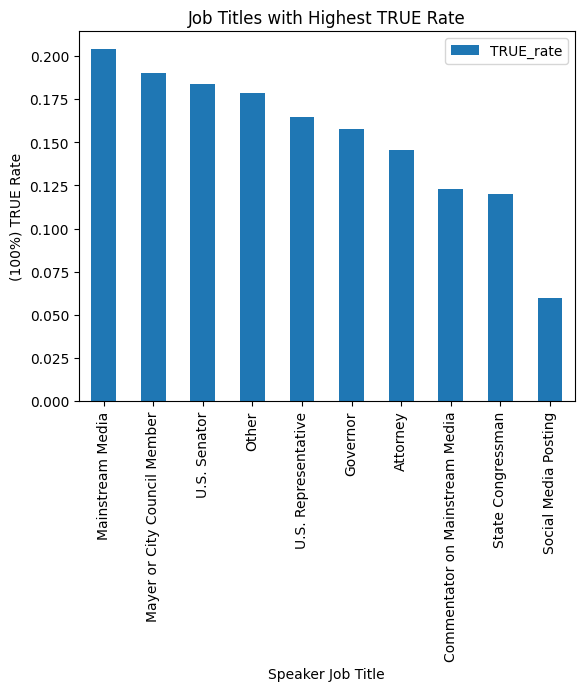

In [ ]:
df_titlecat_TRUE_rate.sort_values(by='TRUE_rate', ascending=False).plot(kind='bar', x='title_cat', y='TRUE_rate')
plt.title('Job Titles with Highest TRUE Rate')
plt.xlabel('Speaker Job Title')
plt.ylabel('(100%) TRUE Rate')
plt.xticks(rotation=90)
plt.show()

## Context

In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
df = df.dropna(subset=['context'])
df['context'] = df['context'].apply(lambda x: x.lower())

<ipython-input-373-4af2d62f18fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['context'] = df['context'].apply(lambda x: x.lower())


In [ ]:
def categorize_context(context):
  if "social media" in context:
    return "Social Media"
  elif "interview" in context:
    return "Interview"
  elif "speech" in context:
    return "Speech"
  elif "advertisement" or "ad" in context:
    return "Advertisement"
  else:
    return "Others"

df['context_category'] = df['context'].apply(categorize_context)

In [ ]:
#calculate each context_category's percentage of "FALSE" in adj_label
df_context_false_rate = (df.groupby('context_category')['adj_label']
                          .apply(lambda x: (x == 'FALSE').sum() / x.count())
                          .reset_index(name='false_rate'))
df_context_false_rate

,context_category,false_rate
0,Advertisement,0.450104
1,Interview,0.447588
2,Social Media,0.701754
3,Speech,0.367223


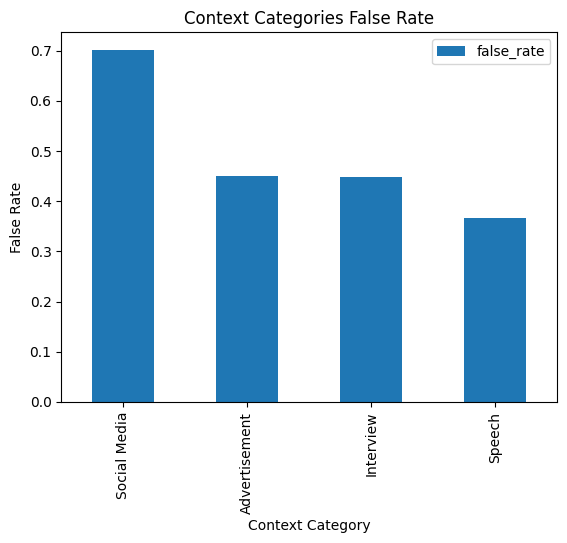

In [ ]:
df_context_false_rate.sort_values(by='false_rate', ascending=False).plot(kind='bar', x='context_category', y='false_rate')
plt.title('Context Categories False Rate')
plt.xlabel('Context Category')
plt.ylabel('False Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
valid_speaker_df = df.groupby('speaker').filter(lambda x: len(x) >= 25)
speaker_label_counts = valid_speaker_df.groupby(['speaker', 'label']).size().reset_index(name='counts')
pivot_table_result = speaker_label_counts.pivot_table(index='speaker', columns='label', values='counts', fill_value=0)
pivot_table_result

label,FALSE,TRUE,barely-true,half-true,mostly-true,pants-fire
speaker,,,,,,
alan-grayson,5,7,6,4,11,1
allen-west,9,3,6,3,1,4
barack-obama,81,123,70,165,163,9
ben-carson,12,0,7,3,2,4
bernie-s,12,14,18,21,41,0
...,...,...,...,...,...,...
tim-kaine,4,10,8,17,15,0
tom-barrett,5,3,2,8,5,3
tommy-thompson,8,3,6,4,5,3


In [ ]:
# prompt: adjust column order to: TRUE, mostly-true, half-true, barely-true, FALSE, pants-fire

pivot_table_result = pivot_table_result[['TRUE', 'mostly-true', 'half-true', 'barely-true', 'FALSE', 'pants-fire']]
pivot_table_result


label,TRUE,mostly-true,half-true,barely-true,FALSE,pants-fire
speaker,,,,,,
alan-grayson,7,11,4,6,5,1
allen-west,3,1,3,6,9,4
barack-obama,123,163,165,70,81,9
ben-carson,0,2,3,7,12,4
bernie-s,14,41,21,18,12,0
...,...,...,...,...,...,...
tim-kaine,10,15,17,8,4,0
tom-barrett,3,5,8,2,5,3
tommy-thompson,3,5,4,6,8,3


In [ ]:
# prompt: calculate correlations between each column

import pandas as pd

# Create a DataFrame


# Calculate correlations between each column
correlations = pivot_table_result.corr()

# Print the correlations
print(correlations)


label            TRUE  mostly-true  half-true  barely-true     FALSE  \
label                                                                  
TRUE         1.000000     0.943616   0.930969     0.738667  0.571174   
mostly-true  0.943616     1.000000   0.959651     0.812810  0.646458   
half-true    0.930969     0.959651   1.000000     0.856898  0.713093   
barely-true  0.738667     0.812810   0.856898     1.000000  0.871931   
FALSE        0.571174     0.646458   0.713093     0.871931  1.000000   
pants-fire   0.035047     0.071713   0.137967     0.307480  0.571637   

label        pants-fire  
label                    
TRUE           0.035047  
mostly-true    0.071713  
half-true      0.137967  
barely-true    0.307480  
FALSE          0.571637  
pants-fire     1.000000  


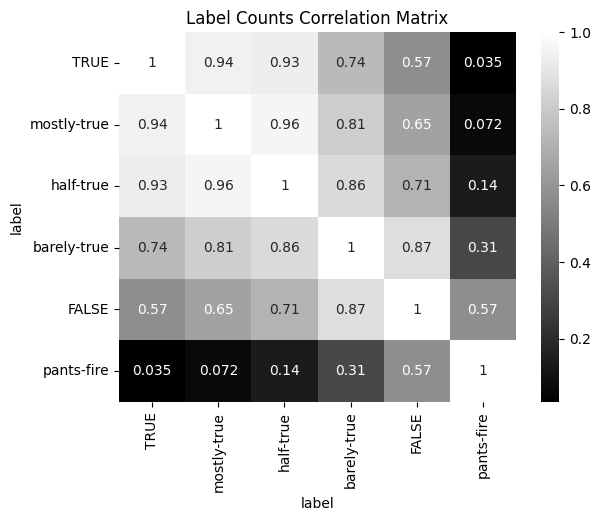

In [ ]:
# prompt: adjust color scale to blue

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(correlations, annot=True, cmap='gray')
plt.title('Label Counts Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
df = df[df['party']=='democrat'] #republican
valid_speaker_df = df.groupby('speaker').filter(lambda x: len(x) >= 25)
speaker_label_counts = valid_speaker_df.groupby(['speaker', 'label']).size().reset_index(name='counts')
pivot_table_result = speaker_label_counts.pivot_table(index='speaker', columns='label', values='counts', fill_value=0)
pivot_table_result

label,FALSE,TRUE,barely-true,half-true,mostly-true,pants-fire
speaker,,,,,,
alan-grayson,5,7,6,4,11,1
barack-obama,81,123,70,165,163,9
bill-clinton,2,9,4,12,11,3
bill-nelson,2,4,3,8,10,0
bill-white,3,6,2,5,7,3
charlie-crist,15,16,15,22,20,2
david-cicilline,4,8,7,5,4,1
debbie-wasserman-schultz,9,5,7,8,15,3
democratic-congressional-campaign-committee,8,0,11,5,1,9


In [ ]:
# prompt: adjust column order to: TRUE, mostly-true, half-true, barely-true, FALSE, pants-fire

pivot_table_result = pivot_table_result[['TRUE', 'mostly-true', 'half-true', 'barely-true', 'FALSE', 'pants-fire']]
pivot_table_result


label,TRUE,mostly-true,half-true,barely-true,FALSE,pants-fire
speaker,,,,,,
alan-grayson,7,11,4,6,5,1
barack-obama,123,163,165,70,81,9
bill-clinton,9,11,12,4,2,3
bill-nelson,4,10,8,3,2,0
bill-white,6,7,5,2,3,3
charlie-crist,16,20,22,15,15,2
david-cicilline,8,4,5,7,4,1
debbie-wasserman-schultz,5,15,8,7,9,3
democratic-congressional-campaign-committee,0,1,5,11,8,9


In [ ]:
# prompt: calculate correlations between each column

import pandas as pd

# Create a DataFrame


# Calculate correlations between each column
correlations = pivot_table_result.corr()

# Print the correlations
print(correlations)


label            TRUE  mostly-true  half-true  barely-true     FALSE  \
label                                                                  
TRUE         1.000000     0.984487   0.976849     0.972494  0.961595   
mostly-true  0.984487     1.000000   0.993054     0.972008  0.977027   
half-true    0.976849     0.993054   1.000000     0.970809  0.982777   
barely-true  0.972494     0.972008   0.970809     1.000000  0.975547   
FALSE        0.961595     0.977027   0.982777     0.975547  1.000000   
pants-fire   0.609548     0.608942   0.625931     0.696291  0.674329   

label        pants-fire  
label                    
TRUE           0.609548  
mostly-true    0.608942  
half-true      0.625931  
barely-true    0.696291  
FALSE          0.674329  
pants-fire     1.000000  


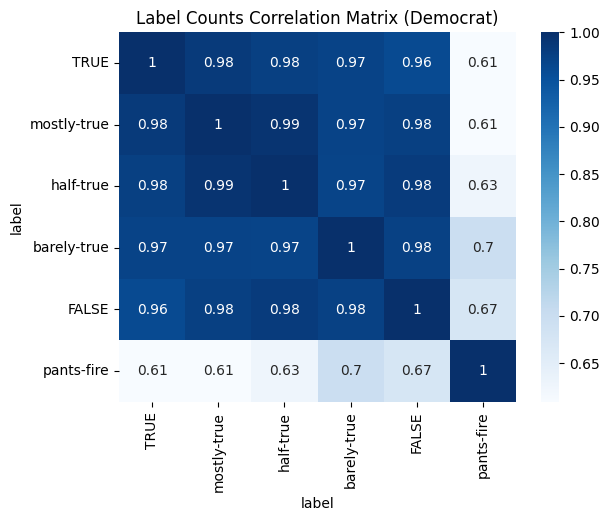

In [ ]:
# prompt: adjust color scale to blue

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.title('Label Counts Correlation Matrix (Democrat)')
plt.show()


In [ ]:
import pandas as pd
df_test = pd.read_csv('test.tsv', delimiter='\t')
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_valid = pd.read_csv('valid.tsv', delimiter='\t')

df = pd.concat([df_test, df_train, df_valid], ignore_index=True)

In [ ]:
df['adj_label'] = df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
df = df[df['party']=='republican']
valid_speaker_df = df.groupby('speaker').filter(lambda x: len(x) >= 25)
speaker_label_counts = valid_speaker_df.groupby(['speaker', 'label']).size().reset_index(name='counts')
pivot_table_result = speaker_label_counts.pivot_table(index='speaker', columns='label', values='counts', fill_value=0)
pivot_table_result

label,FALSE,TRUE,barely-true,half-true,mostly-true,pants-fire
speaker,,,,,,
allen-west,9,3,6,3,1,4
ben-carson,12,0,7,3,2,4
bob-mcdonnell,8,9,6,7,6,3
chris-christie,18,22,10,27,19,8
dan-patrick,5,4,4,4,4,4
david-dewhurst,9,4,8,10,5,5
donald-trump,117,14,63,51,37,61
eric-cantor,8,7,9,4,4,4
george-allen,9,8,2,3,4,1


In [ ]:
# prompt: adjust column order to: TRUE, mostly-true, half-true, barely-true, FALSE, pants-fire

pivot_table_result = pivot_table_result[['TRUE', 'mostly-true', 'half-true', 'barely-true', 'FALSE', 'pants-fire']]
pivot_table_result


label,TRUE,mostly-true,half-true,barely-true,FALSE,pants-fire
speaker,,,,,,
allen-west,3,1,3,6,9,4
ben-carson,0,2,3,7,12,4
bob-mcdonnell,9,6,7,6,8,3
chris-christie,22,19,27,10,18,8
dan-patrick,4,4,4,4,5,4
david-dewhurst,4,5,10,8,9,5
donald-trump,14,37,51,63,117,61
eric-cantor,7,4,4,9,8,4
george-allen,8,4,3,2,9,1


In [ ]:
# prompt: calculate correlations between each column

import pandas as pd

# Create a DataFrame


# Calculate correlations between each column
correlations = pivot_table_result.corr()

# Print the correlations
print(correlations)


label            TRUE  mostly-true  half-true  barely-true     FALSE  \
label                                                                  
TRUE         1.000000     0.779463   0.763604     0.544491  0.446250   
mostly-true  0.779463     1.000000   0.883749     0.815658  0.693466   
half-true    0.763604     0.883749   1.000000     0.841815  0.738269   
barely-true  0.544491     0.815658   0.841815     1.000000  0.868953   
FALSE        0.446250     0.693466   0.738269     0.868953  1.000000   
pants-fire   0.285704     0.507094   0.646114     0.779837  0.910514   

label        pants-fire  
label                    
TRUE           0.285704  
mostly-true    0.507094  
half-true      0.646114  
barely-true    0.779837  
FALSE          0.910514  
pants-fire     1.000000  


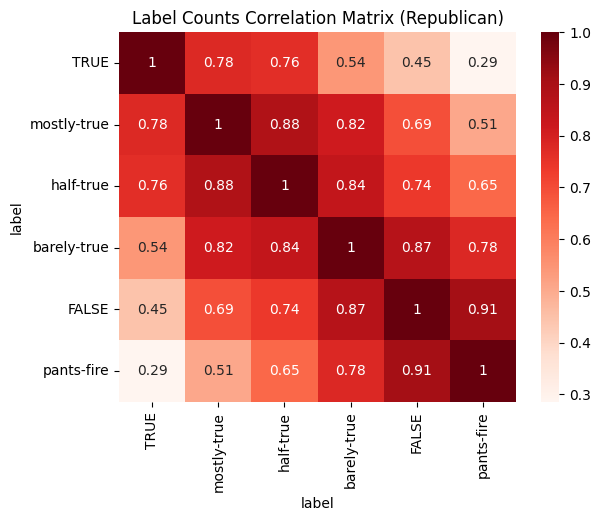

In [ ]:
# prompt: adjust color scale to blue

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(correlations, annot=True, cmap='Reds')
plt.title('Label Counts Correlation Matrix (Republican)')
plt.show()


In [ ]:
import pandas as pd
test_df = pd.read_csv('test.tsv', delimiter='\t')
train_df = pd.read_csv('train.tsv', delimiter='\t')
valid_df = pd.read_csv('valid.tsv', delimiter='\t')

test_df['adj_label'] = test_df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')
train_df['adj_label'] = train_df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')
valid_df['adj_label'] = valid_df['label'].apply(lambda x: 'TRUE' if x in ['half-true', 'mostly-true', 'TRUE'] else 'FALSE')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorflow_hub as hub

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Assuming you have separate DataFrames for train, valid, and test
# Replace 'train_df', 'valid_df', 'test_df' with your actual DataFrame names

# Train DataFrame
train_df['statement'] = train_df['statement'].fillna('')
train_df['context'] = train_df['context'].fillna('')
train_df['subjects'] = train_df['subjects'].fillna('')
train_df['speaker'] = train_df['speaker'].fillna('')
train_df['state'] = train_df['state'].fillna('')
train_df['party'] = train_df['party'].fillna('')
train_df['speaker_job_title'] = train_df['speaker_job_title'].fillna('')

# Validation DataFrame
valid_df['statement'] = valid_df['statement'].fillna('')
valid_df['context'] = valid_df['context'].fillna('')
valid_df['subjects'] = valid_df['subjects'].fillna('')
valid_df['speaker'] = valid_df['speaker'].fillna('')
valid_df['state'] = valid_df['state'].fillna('')
valid_df['party'] = valid_df['party'].fillna('')
valid_df['speaker_job_title'] = valid_df['speaker_job_title'].fillna('')

# Test DataFrame
test_df['statement'] = test_df['statement'].fillna('')
test_df['context'] = test_df['context'].fillna('')
test_df['subjects'] = test_df['subjects'].fillna('')
test_df['speaker'] = test_df['speaker'].fillna('')
test_df['state'] = test_df['state'].fillna('')
test_df['party'] = test_df['party'].fillna('')
test_df['speaker_job_title'] = test_df['speaker_job_title'].fillna('')

# Convert text columns to embeddings
text_columns = ['statement', 'context', 'subjects', 'speaker', 'state', 'party', 'speaker_job_title']

# Function to convert text to embeddings
def get_embeddings(data):
    return np.concatenate([np.array(data[col].apply(lambda x: np.array(embed([x]).numpy()[0])).tolist()) for col in text_columns], axis=1)

# Train set
X_train = get_embeddings(train_df)


# Validation set
X_valid = get_embeddings(valid_df)


# Test set
X_test = get_embeddings(test_df)

# Extract labels from DataFrames
y_train = train_df['adj_label']
y_valid = valid_df['adj_label']
y_test = test_df['adj_label']

# Use LabelEncoder on the training set
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Transform labels in the validation and test sets
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = clf.predict(X_valid)

# Calculate metrics on the validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred, average='weighted')
precision_valid = precision_score(y_valid, y_valid_pred, average='weighted')
recall_valid = recall_score(y_valid, y_valid_pred, average='weighted')

print(f"Validation Accuracy: {accuracy_valid:.4f}")
print(f"Validation F1 Score: {f1_valid:.4f}")
print(f"Validation Precision: {precision_valid:.4f}")
print(f"Validation Recall: {recall_valid:.4f}")

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate metrics on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")


Validation Accuracy: 0.6464
Validation F1 Score: 0.6381
Validation Precision: 0.6536
Validation Recall: 0.6464
Test Accuracy: 0.6306
Test F1 Score: 0.6187
Test Precision: 0.6263
Test Recall: 0.6306


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your Random Forest Classifier 'clf'

# Make predictions on the validation set
y_valid_pred = clf.predict(X_valid)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()